> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-Show-Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the `Project Details` page of `Investigate a Dataset` lesson for this course. List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# import statements for all of the packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


In [2]:
# load data and check how much row and columns it contains.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.shape

(110527, 14)

In [3]:
# show data
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [4]:
# In the below cells we will see the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### There's no NaN values in any of the columns.

In [5]:
#checking if there's any duplicates
sum(df.duplicated())

0

In [6]:
sum(df["AppointmentID"].duplicated())


0

##### There is no duplicate rows or appointment IDs.

In [7]:
# illustrate data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


##### it appears that the 'age' column has a negative value that should be cleaned.

# Data Cleaning

#### By checking it appears that we have PatientID as float and gonna convert to integer, also both of the ScheduledDay and AppointmentDay have false types and it will be converted to datetime

In [8]:
df['PatientId'] = df['PatientId'].astype('int')
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [9]:
# Make the column names lower-case and uniform
df.columns = df.columns.str.lower().str.replace('-', '_')
#df.columns

In [10]:
# To clean "Age" column, first let's see how many rows have this problem.
print(df[df['age'] == -1])
df.drop(index=df[df['age']==-1].index, inplace=True)

             patientid  appointmentid gender              scheduledday  \
99832  465943158731293        5775010      F 2016-06-06 08:58:13+00:00   

                 appointmentday  age neighbourhood  scholarship  hipertension  \
99832 2016-06-06 00:00:00+00:00   -1         ROMÃO            0             0   

       diabetes  alcoholism  handcap  sms_received no_show  
99832         0           0        0             0      No  


In [11]:
df['no_show'].value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

# Exploratory Data Analysis

### 1. How many people make an appointment and did not show up?

Text(0.5, 1.0, 'The percentage of patients that showed up and did not showed up for the appointment.')

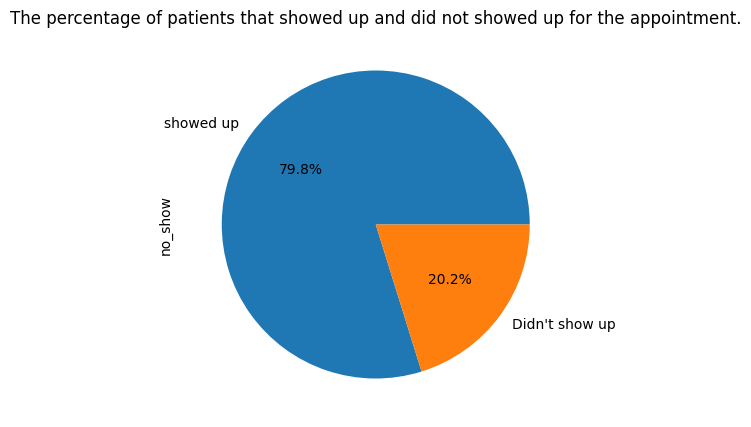

In [12]:
fig, ax = plt.subplots(figsize=(5,5))
df['no_show'].value_counts(normalize=True).plot.pie(ax=ax, labels=["showed up", "Didn't show up"], autopct='%1.1f%%')
ax.set_title('The percentage of patients that showed up and did not showed up for the appointment.')




In [13]:
df['no_show'].value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

#### As seen above around 20.19 percent of the people doesn't show up

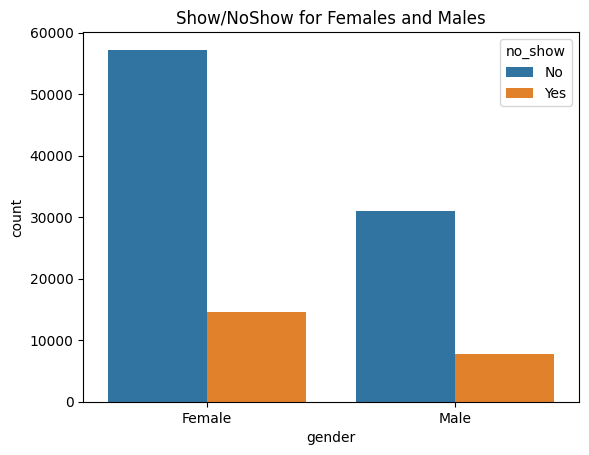

In [14]:
ax = sns.countplot(x=df['gender'], hue=df['no_show'], data=df)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#### It indicates that the number of the Women who showed up is greater than the Men's number 

In [15]:
## choose the important features and droping unnecessary columns
df.drop(columns='appointmentid', inplace=True)

### 2.What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

###  2. Neighbourhood

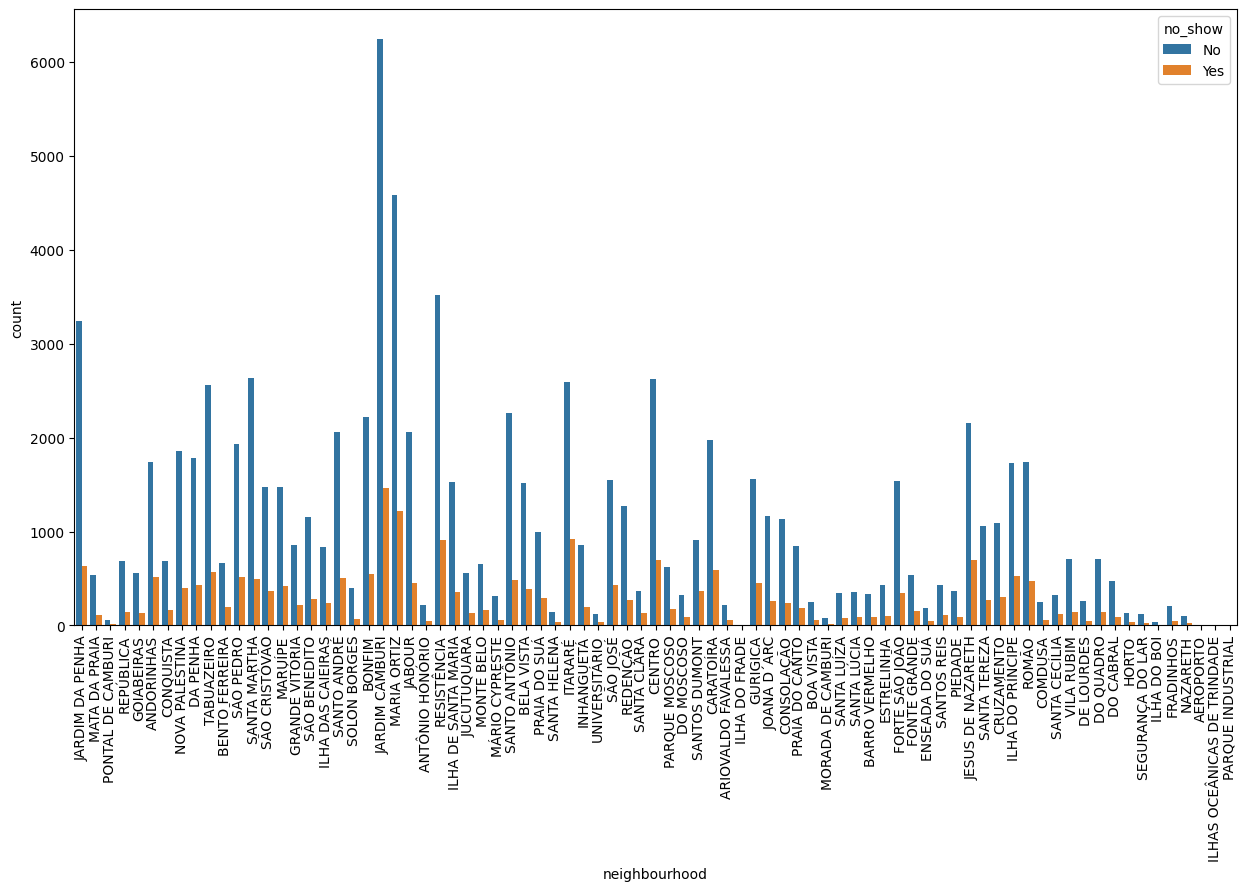

In [16]:
plt.figure(figsize=(15,8))
fig = sns.countplot(x='neighbourhood',hue='no_show',data=df)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);

plt.show()


#### It concludes that there's 81 Neighboorhoods and the highest number of patients showed up in 'JARDIM CAMBURI' hospital

###  3. Insurance

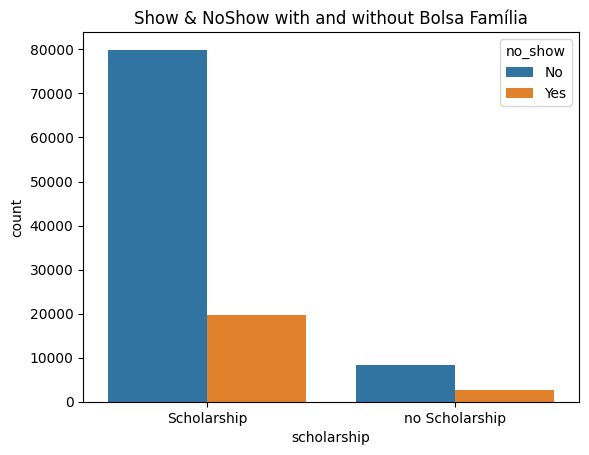

In [17]:
ax = sns.countplot(x=df['scholarship'], hue=df['no_show'], data=df)
ax.set_title("Show & NoShow with and without Bolsa Família")
x_ticks_labels=['Scholarship', 'no Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

<AxesSubplot: >

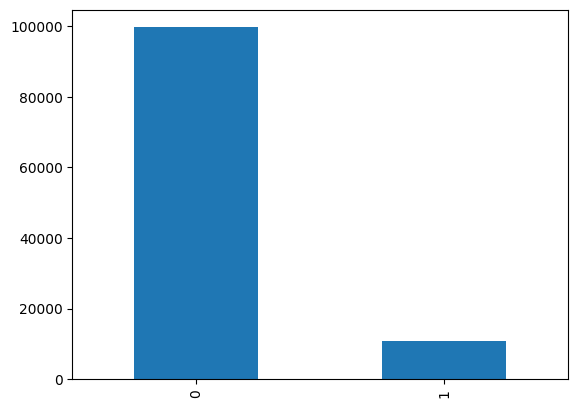

In [18]:
df['scholarship'].value_counts().plot(kind='bar')

#### This graph shows that people who have no Scolarship are only 9.8 percent, but also there's no huge difference between the people who have no Scolarship to be showed up or not as seen on the graph.
i.e, 90 percent have the Bosla Familia Scolarship which is great percent.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110526 non-null  int64              
 1   gender          110526 non-null  object             
 2   scheduledday    110526 non-null  datetime64[ns, UTC]
 3   appointmentday  110526 non-null  datetime64[ns, UTC]
 4   age             110526 non-null  int64              
 5   neighbourhood   110526 non-null  object             
 6   scholarship     110526 non-null  int64              
 7   hipertension    110526 non-null  int64              
 8   diabetes        110526 non-null  int64              
 9   alcoholism      110526 non-null  int64              
 10  handcap         110526 non-null  int64              
 11  sms_received    110526 non-null  int64              
 12  no_show         110526 non-null  object             
dtypes: datetime64[

### 4. Impact of scheduled day on attendance

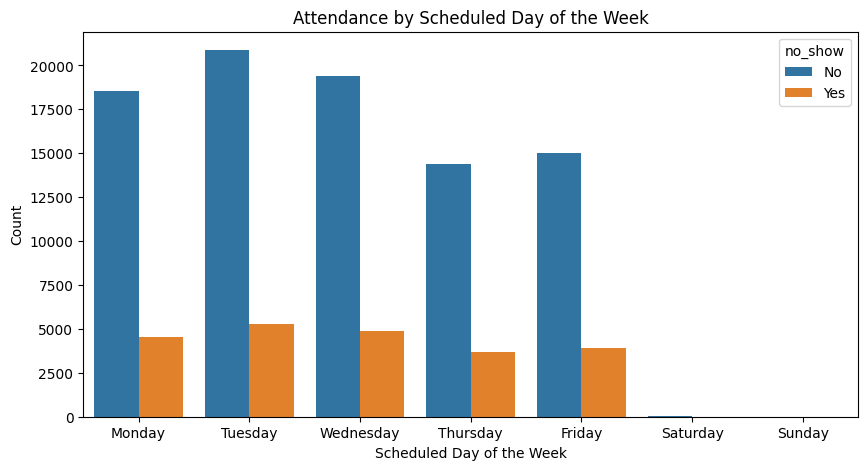

In [20]:
df['scheduled_day_of_week'] = pd.to_datetime(df['scheduledday']).dt.day_name()
plt.figure(figsize=(10, 5))
g = sns.countplot(x='scheduled_day_of_week', hue='no_show', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
g.figure.get_axes()[0].legend(title='no_show',loc='upper right')

plt.title('Attendance by Scheduled Day of the Week')
plt.xlabel('Scheduled Day of the Week')
plt.ylabel('Count')
plt.show()

#### As seen people came on Tuesday are the highest number and on Thursday are the lowest, but if we compare overall there's slight difference between all the weekdays

### 5.SMS

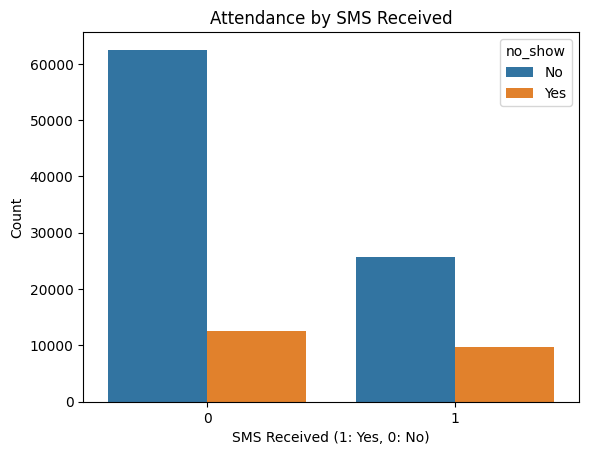

In [21]:
sns.countplot(x='sms_received', hue='no_show', data=df)
plt.title('Attendance by SMS Received')
plt.xlabel('SMS Received (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

#### Appears that it doesn't affect our analysis at all as almost the number of the people that have showed up and didn't received a SMS

In [22]:
# create new column to represent the wait days
df['wait_days'] = df['appointmentday'] - df['scheduledday']
df["wait_days"] = df["wait_days"].astype(str)
df["wait_days"] = df["wait_days"].apply(lambda x: x.split(" ")[0])
df["wait_days"] = df["wait_days"].astype(int)
df.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,scheduled_day_of_week,wait_days
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,-1
1,558997776694438,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,-1
2,4262962299951,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,-1
3,867951213174,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,-1
4,8841186448183,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,-1


In [23]:
df["wait_days"].value_counts()

-1      38562
 1       6725
 3       5290
 0       5213
 6       4906
        ...  
 81         1
 126        1
 125        1
 150        1
 122        1
Name: wait_days, Length: 131, dtype: int64

In [24]:
# Exploring unreasonable wait days
drop_index = df[df["wait_days"] < 0].index
df.drop(drop_index, inplace = True)

df[df["wait_days"] < 0]

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,scheduled_day_of_week,wait_days


In [25]:
# calculate the attendance rate and group by wait_days

df['wait_days'] = df['wait_days'].apply(lambda x: max(x, 0))
grouped_data = df.groupby('wait_days')['no_show'].value_counts(normalize=True).unstack().fillna(0)


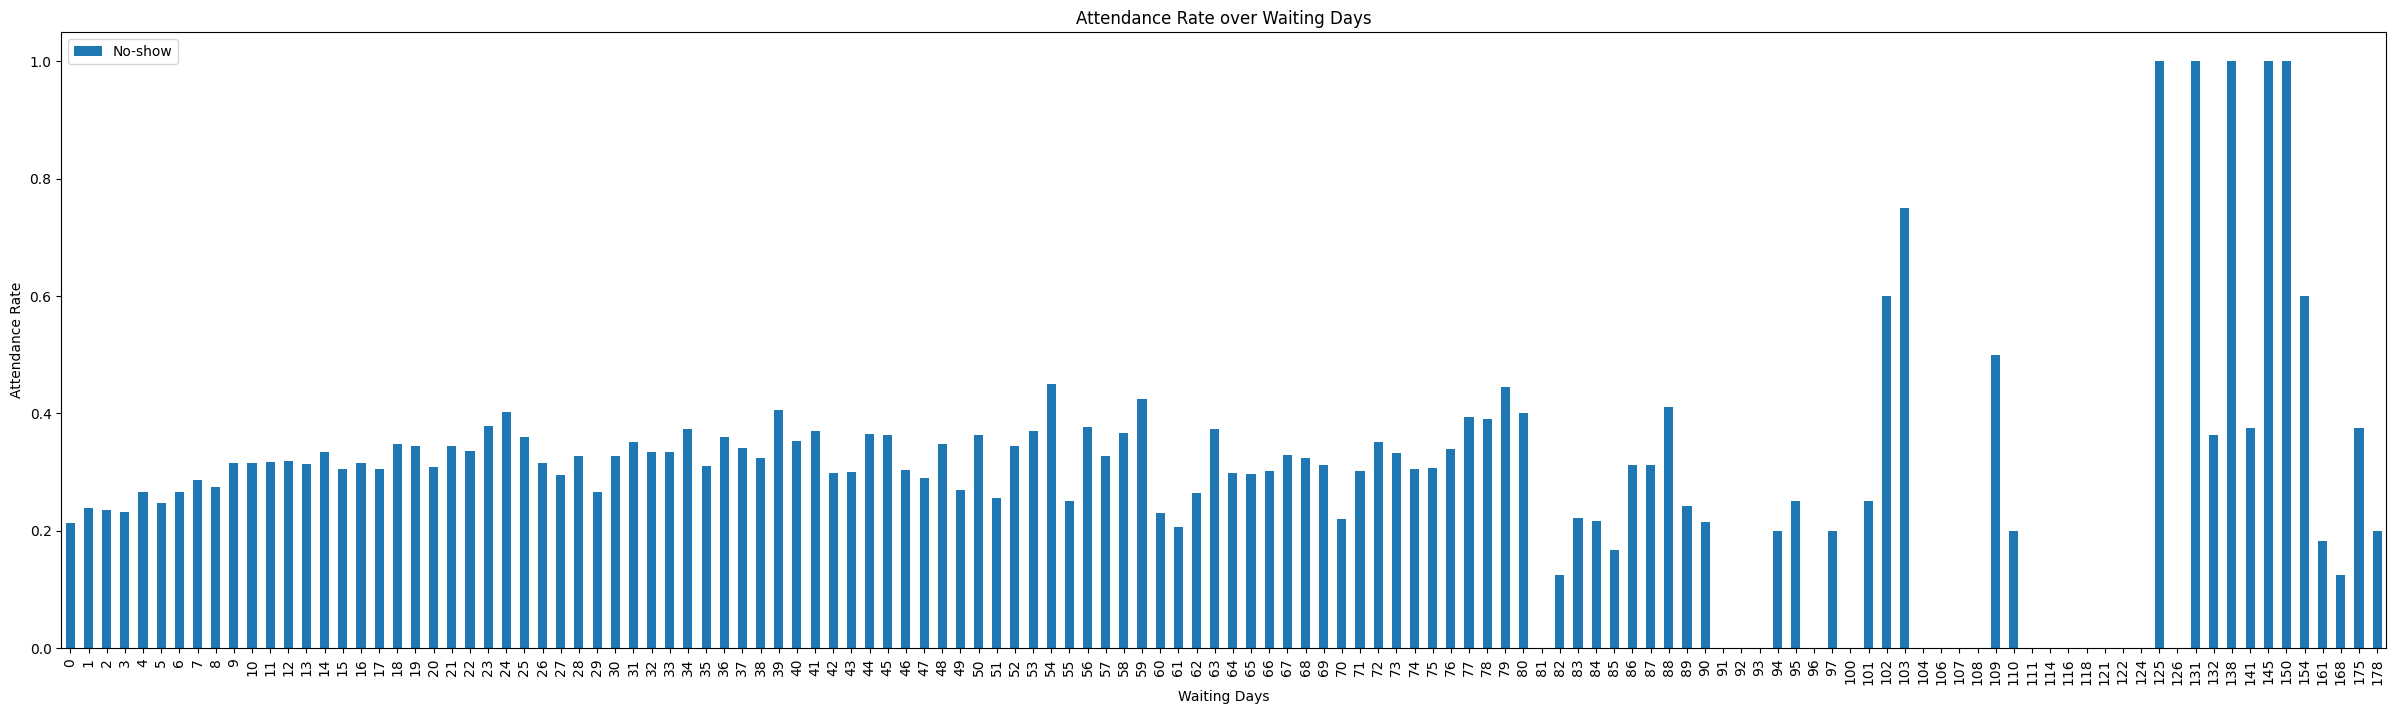

In [26]:
plt.figure(figsize=(30,8))
grouped_data['Yes'].plot(kind='bar', label='No-show')
plt.title('Attendance Rate over Waiting Days')
plt.xlabel('Waiting Days')
plt.ylabel('Attendance Rate')
plt.legend()
plt.show()

#### The no-show rate significantly increases when the wait period exceeds 102 days; however, due to the limited number of appointments scheduled with such extended wait times, even a few instances of no-shows can disproportionately impact the overall no-show percentage.

<a id='conclusions'></a>
## Conclusions

>Approximately 20.19% of individuals didn't attend their appointments.

>More women attended appointments compared to men.

>There are 81 neighborhoods, and 'JARDIM CAMBURI' hospital had the highest attendance.

>Only 9.8% of individuals lack a scholarship, with minimal attendance difference.

>The absence of SMS reminders doesn't significantly impact attendance.

>Individuals with shorter waiting periods generally attend appointments.

>The no-show rate rises after a 102-day wait, but due to limited instances, it disproportionately affects the overall percentage

## Submitting the Project 


In [28]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 1051411 bytes to Investigate_a_Dataset.html
